<a href="https://colab.research.google.com/github/23Aditya/Binary-Logistic-Regression-Code/blob/master/Air_Pressure_System_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action='ignore')

In [26]:
train_df = pd.read_csv('/content/aps_failure_test_set_processed_8bit.csv')
train_labels = pd.read_csv('aps_failure_training_set.csv')['class']
test_df = pd.read_csv('aps_failure_test_set_processed_8bit.csv')
test_labels = pd.read_csv('aps_failure_test_set.csv')['class']

In [27]:
train_df['class'] = train_labels
test_df['class'] = test_labels

In [28]:
train_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.289062,-0.351562,-0.101562,-0.007812,-0.039062,-0.015625,-0.164062,-0.242188,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.304688,-0.257812,-0.007812,-0.078125,-0.117188,-0.078125,-0.132812,-0.351562,-0.328125,-0.109375,-0.054688,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.398438,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.257812,-0.273438,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.359375,-0.406250,-0.406250,-0.406250,-0.382812,-0.406250,-0.171875,-0.750000,-0.757812,-0.398438,0.0,-0.437500,-0.007812,-0.234375,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.203125,-0.039062,-0.085938,-0.140625,-0.234375,-0.382812,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.078125,-0.406250,-0.085938,-0.375000,-0.265625,-0.195312,-0.320312,-0.210938,-0.398438,-0.453125,-0.156250,-0.000000,-0.007812,-0.156250,-0.171875,-0.515625,-0.242188,-0.046875,-0.093750,-0.039062,-0.226562,-0.523438,-0.320312,-0.164062,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,-0.343750,-0.445312,-0.476562,-0.054688,-0.164062,-0.414062,-0.437500,-0.351562,-0.289062,-0.203125,-0.140625,-0.023438,-0.03125,-0.242188,-0.281250,-0.406250,-0.296875,-0.304688,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.312500,-0.343750,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.203125,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.296875,-0.257812,-0.015625,-0.101562,-0.125000,-0.078125,-0.132812,-0.351562,-0.328125,-0.101562,-0.062500,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.406250,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.312500,-0.273438,-0.046875,-0.078125,-0.046875,-0.031250,-0.023438,-0.015625,-0.015625,-0.007812,-0.671875,-0.406250,-0.406250,-0.406250,-0.398438,-0.406250,-0.171875,-0.960938,-0.968750,-0.398438,0.0,-0.437500,-0.007812,-0.242188,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.195312,-0.039062,-0.085938,-0.148438,-0.234375,-0.375000,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.070312,-0.406250,-0.0859

In [29]:
test_df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.289062,-0.351562,-0.101562,-0.007812,-0.039062,-0.015625,-0.164062,-0.242188,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.304688,-0.257812,-0.007812,-0.078125,-0.117188,-0.078125,-0.132812,-0.351562,-0.328125,-0.109375,-0.054688,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.398438,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.257812,-0.273438,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.359375,-0.406250,-0.406250,-0.406250,-0.382812,-0.406250,-0.171875,-0.750000,-0.757812,-0.398438,0.0,-0.437500,-0.007812,-0.234375,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.203125,-0.039062,-0.085938,-0.140625,-0.234375,-0.382812,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.078125,-0.406250,-0.085938,-0.375000,-0.265625,-0.195312,-0.320312,-0.210938,-0.398438,-0.453125,-0.156250,-0.000000,-0.007812,-0.156250,-0.171875,-0.515625,-0.242188,-0.046875,-0.093750,-0.039062,-0.226562,-0.523438,-0.320312,-0.164062,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,-0.343750,-0.445312,-0.476562,-0.054688,-0.164062,-0.414062,-0.437500,-0.351562,-0.289062,-0.203125,-0.140625,-0.023438,-0.03125,-0.242188,-0.281250,-0.406250,-0.296875,-0.304688,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,neg,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.312500,-0.343750,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.203125,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.296875,-0.257812,-0.015625,-0.101562,-0.125000,-0.078125,-0.132812,-0.351562,-0.328125,-0.101562,-0.062500,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.406250,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.312500,-0.273438,-0.046875,-0.078125,-0.046875,-0.031250,-0.023438,-0.015625,-0.015625,-0.007812,-0.671875,-0.406250,-0.406250,-0.406250,-0.398438,-0.406250,-0.171875,-0.960938,-0.968750,-0.398438,0.0,-0.437500,-0.007812,-0.242188,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.195312,-0.039062,-0.085938,-0.148438,-0.234375,-0.375000,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.070312,-0.406250,-0.0859

In [30]:
y_train = train_df['class'].copy()
X_train = train_df.drop('class', axis=1).copy()

y_test = test_df['class'].copy()
X_test = test_df.drop('class', axis=1).copy()

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Test Accuracy: {:.4f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 97.6562%


In [32]:
X_train

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.109375,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.289062,-0.351562,-0.101562,-0.007812,-0.039062,-0.015625,-0.164062,-0.242188,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.304688,-0.257812,-0.007812,-0.078125,-0.117188,-0.078125,-0.132812,-0.351562,-0.328125,-0.109375,-0.054688,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.398438,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.257812,-0.273438,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.992188,0.359375,-0.406250,-0.406250,-0.406250,-0.382812,-0.406250,-0.171875,-0.750000,-0.757812,-0.398438,0.0,-0.437500,-0.007812,-0.234375,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.203125,-0.039062,-0.085938,-0.140625,-0.234375,-0.382812,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.078125,-0.406250,-0.085938,-0.375000,-0.265625,-0.195312,-0.320312,-0.210938,-0.398438,-0.453125,-0.156250,-0.000000,-0.007812,-0.156250,-0.171875,-0.515625,-0.242188,-0.046875,-0.093750,-0.039062,-0.226562,-0.523438,-0.320312,-0.164062,-0.023438,-0.03125,-0.007812,-0.101562,-0.007812,-0.03125,-0.023438,-0.03125,-0.343750,-0.445312,-0.476562,-0.054688,-0.164062,-0.414062,-0.437500,-0.351562,-0.289062,-0.203125,-0.140625,-0.023438,-0.03125,-0.242188,-0.281250,-0.406250,-0.296875,-0.304688,-0.382812,-0.382812,-0.375000,-0.351562,-0.312500,-0.195312,-0.304688,-0.171875,-0.023438,-0.023438
1,-0.406250,-0.289062,-0.468750,-0.007812,-0.046875,-0.054688,-0.007812,-0.03125,-0.054688,-0.117188,-0.179688,-0.335938,-0.421875,-0.351562,-0.164062,-0.031250,-0.429688,-0.054688,-0.023438,-0.023438,-0.109375,-0.109375,-0.437500,-0.437500,-0.312500,-0.343750,-0.101562,-0.007812,-0.039062,-0.015625,-0.171875,-0.203125,-0.03125,-0.015625,-0.023438,-0.03125,-0.03125,-0.078125,-0.328125,-0.296875,-0.257812,-0.015625,-0.101562,-0.125000,-0.078125,-0.132812,-0.351562,-0.328125,-0.101562,-0.062500,-0.046875,-0.015625,-0.367188,-0.375000,-0.343750,-0.359375,-0.375000,-0.367188,-0.328125,-0.351562,-0.148438,-0.109375,-0.406250,-0.156250,-0.195312,-0.156250,-0.132812,-0.429688,-0.375000,-0.312500,-0.273438,-0.046875,-0.078125,-0.046875,-0.031250,-0.023438,-0.015625,-0.015625,-0.007812,-0.671875,-0.406250,-0.406250,-0.406250,-0.398438,-0.406250,-0.171875,-0.960938,-0.968750,-0.398438,0.0,-0.437500,-0.007812,-0.242188,-0.015625,-0.414062,-0.093750,-0.320312,-0.109375,-0.195312,-0.039062,-0.085938,-0.148438,-0.234375,-0.375000,-0.421875,-0.312500,-0.156250,-0.101562,-0.031250,-0.007812,-0.070312,-0.406250,-0.085938,-0.312500,-

In [33]:
n_components = 10

pca = PCA(n_components=n_components)
pca.fit(X_train)

X_train_reduced = pd.DataFrame(pca.transform(X_train), index=X_train.index, columns=["PC" + str(i + 1) for i in range(n_components)])
X_test_reduced = pd.DataFrame(pca.transform(X_test), index=X_test.index, columns=["PC" + str(i + 1) for i in range(n_components)])

In [34]:
X_train_reduced

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.402313,2.061850,-0.568900,0.102330,0.009445,0.108378,0.201060,-0.013019,-0.387604,0.116312
1,-2.463987,-0.383105,0.850397,0.102504,0.192724,-0.281467,0.041311,0.025060,-0.086546,-0.076679
2,2.195515,-0.754836,-1.014514,2.221817,-0.381515,-0.237320,-0.316438,-0.553502,-0.263340,-0.035996
3,1.773570,-1.168924,-0.424278,-0.503544,-0.500188,-0.587341,0.281129,-0.201844,-0.233070,0.269163
4,-1.484982,-2.418963,1.270207,0.262514,0.441099,-0.553194,-0.081017,0.072097,0.104319,-0.115729
...,...,...,...,...,...,...,...,...,...,...
15995,3.032902,-0.677699,-0.486809,-0.454157,-1.230749,1.214526,0.139539,0.109181,-0.177012,0.990326
15996,-3.656222,2.129765,0.280739,-0.112234,-0.170026,0.033076,0.035562,0.025551,-0.113329,-0.048498
15997,2.697877,0.498881,-1.606310,-0.836534,-1.461801,-0.417410,-0.456328,0.119834,-0.097718,0.124859
15998,-3.500000,2.118667,-0.163860,0.017357,-0.021054,0.115486,0.122416,-0.052241,-0.180366,0.119946


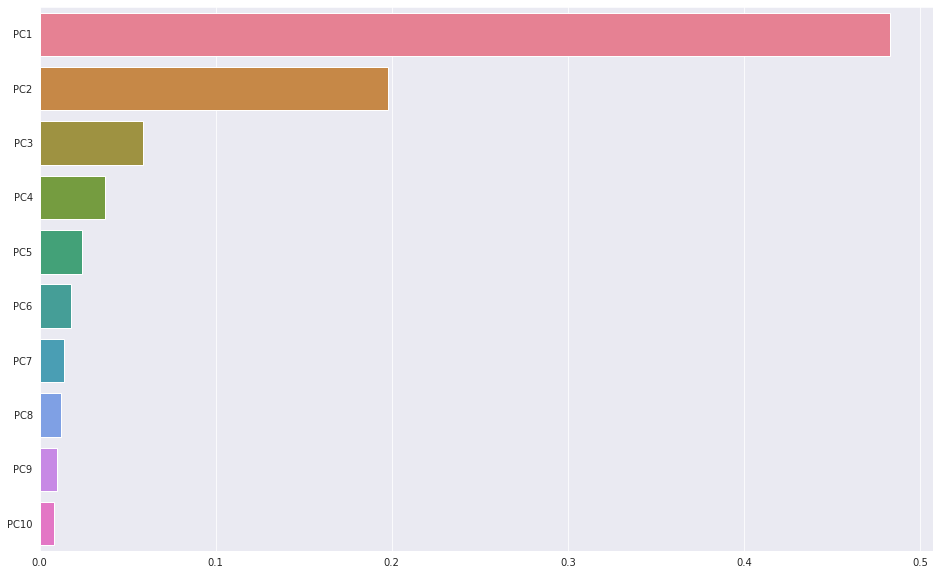

In [35]:
plt.figure(figsize=(16, 10))
sns.barplot(x=pca.explained_variance_ratio_, y=["PC" + str(i + 1) for i in range(n_components)], orient='h', palette='husl')
plt.show()

In [36]:
reduced_model = LogisticRegression()
reduced_model.fit(X_train_reduced, y_train)

print("Test Accuracy (Original Data): {:.4f}%".format(model.score(X_test, y_test) * 100))
print(" Test Accuracy (Reduced Data): {:.4f}%".format(reduced_model.score(X_test_reduced, y_test) * 100))

Test Accuracy (Original Data): 97.6562%
 Test Accuracy (Reduced Data): 97.6562%


In [37]:
print("Ratio of memory usage in bytes (original to reduced): {:.5f}".format(X_train.memory_usage().sum() / X_train_reduced.memory_usage().sum()))

Ratio of memory usage in bytes (original to reduced): 16.99840
